<a href="https://colab.research.google.com/github/000generic/GIGANTIC-FHL2022/blob/stable-branch/TEMPLATE-gigantic-shortie-fasttree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIGANTIC Phylogenomic Pipeline**
# FHL2022 Gene Tree Core - FastTree - Species313
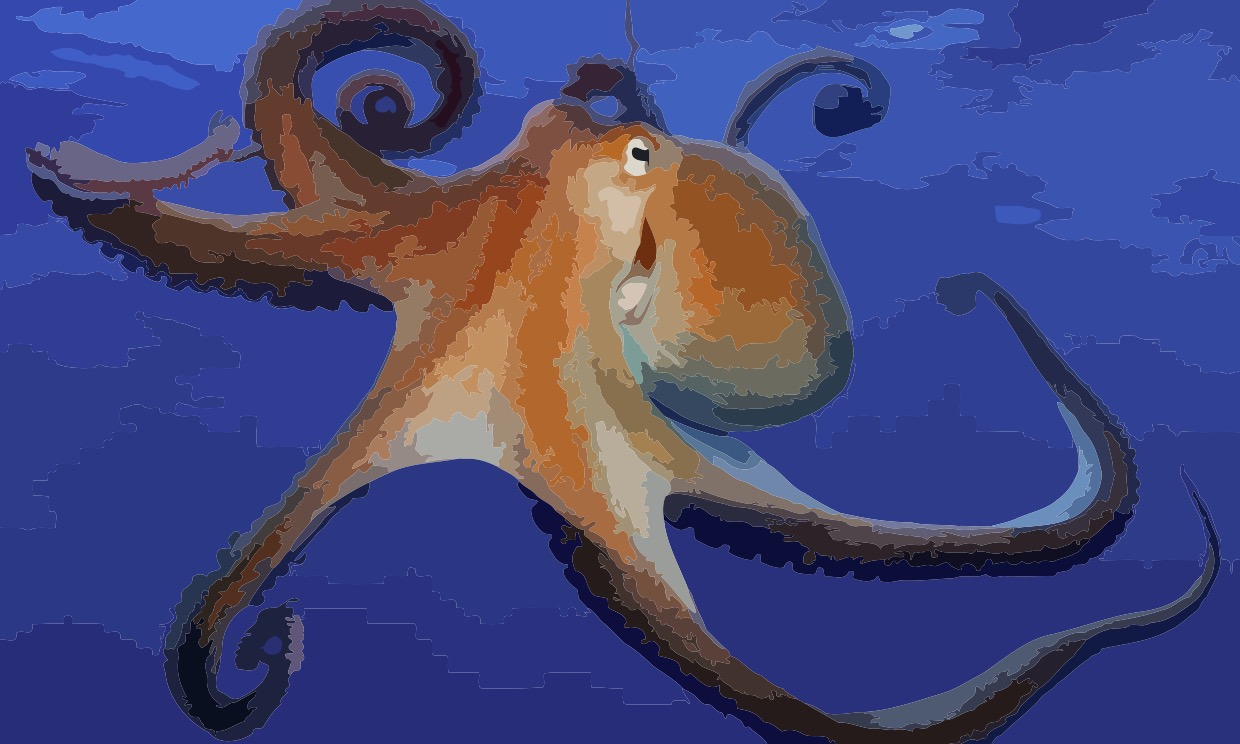

## GIGANTIC Team is [Eric Edsinger](https://github.com/000generic " 🧬"), [Jan Hsiao](https://github.com/jannxiao "🧫"), [Lola Chenxi Deng](https://github.com/LolaDeng "🧪"), and 🐌 🦑 🐙 

<br>

# Welcome :)
<br>


**OVERVIEW**

GIGANTIC is a phylogenomic pipeline that scans genes across genomes to produce phylogenetic trees for genes and species. This notebook runs a variant of GIGANTIC's core tree building pipeline for genes. The notebook is intended for collaborators and students and provides ready access to GIGANTIC's core functionality in gene tree generation. The notebook and GIGANTIC are under active development - new collaborations to use it are very welcome :) GIGANTIC and all associated notebooks are unpublished - please do not share or use outside the 2022 FHL Biodiversity Genomics course.

This notebook takes a user-provided reference gene set, identifies homologs in a user-selected GIGANTIC Metazoa313 species subset, and rapidly (using FastTree) produces maximum likelihood-based gene tree and associated output. The notebook pipeline installs and uses powerful phylogenomic tools, including BUSCO, MAFFT, ClipKit, and FastTree, that are run and integrated using Bash and Python scripts. The notebook can be run in the Google Colab cloud or elsewhere.  Thus, GIGANTIC's core tree building pipeline is made available to others.

#### A Benchling protocol for USERS to prepare INPUT and explore OUTPUT is provided:

[Benchling GIGANTIC Protocol 001](https://benchling.com/s/prt-C6ePxNC4AuGTuCq3XQLz?m=slm-ceHLb7PJqO26qpBZNEZl)

Below is a visual overview of GIGANTIC (coming soon) - this notebook leverages Blocks 0-3, 5, and 10 to prouduce a phylogenetic gene tree:



<br>
<br>
 
# OK - GO!

<br>
<br>
  
## Create upper level directories for GIGANTIC pipeline

In [1]:
%%bash

date_time=$(date '+%Y%m%d%H%M%S')
echo gigantic-run-GIGANTIC$date_time > date_time-directory-info 
echo 'Your GIGANTIC run ID is GIGANTIC'$date_time
echo
echo 'Upper level directory structure is:'
echo

mkdir gigantic-run-GIGANTIC$date_time; echo gigantic-run-GIGANTIC$date_time
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run; echo gigantic-run-GIGANTIC$date_time/gigantic-run
echo
echo 'Top directories within gigantic-run represent major code blocks in GIGANTIC:'
echo
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start; echo 0-start
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/1-genomesdb; echo 1-genomesdb
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/2-othersdb; echo 2-othersdb
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/3-projectdb; echo 3-projectdb
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/4-homologs-busco; echo 4-homologs-busco
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/5-homologs-genes; echo 5-homologs-genes
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/6-trees-species; echo 6-trees-species
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/7-trees-genes; echo 7-trees-genes
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/8-trees-genes; echo 8-trees-clades
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/9-trees-genes; echo 9-trees-groups
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/10-auto-annotation; echo 10-auto-annotation

mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/software
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input/project-species
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input/source-rgs
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input/source-ogs
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input/others-genomes
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input/metazoa313
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input/species-colors
mkdir gigantic-run-GIGANTIC$date_time/gigantic-run/0-start/user-input/busco
echo
echo 'This notebook runs GIGANTIC Blocks 0-3, 5, and 10 to produce a gene family tree'
echo
echo
# Completed
echo 'COMPLETED Create upper level directories for GIGANTIC pipeline'
 

Your GIGANTIC run ID is GIGANTIC20220509063734

Upper level directory structure is:

gigantic-run-GIGANTIC20220509063734
gigantic-run-GIGANTIC20220509063734/gigantic-run

Top directories within gigantic-run represent major code blocks in GIGANTIC:

0-start
1-genomesdb
2-othersdb
3-projectdb
4-homologs-busco
5-homologs-genes
6-trees-species
7-trees-genes
8-trees-clades
9-trees-groups
10-auto-annotation

This notebook runs GIGANTIC Blocks 0-3, 5, and 10 to produce a gene family tree


COMPLETED Create upper level directories for GIGANTIC pipeline


<br>
<br>

## Read in GIGANTIC run top directory name

In [2]:
input_info = open( 'date_time-directory-info', 'r' )

for info in input_info:

  gigantic_run_directory = info[ :-1 ]

input_info.close()

# Completed
output = 'COMPLETED Read in GIGANTIC run top directory name'
print( output )


COMPLETED Read in GIGANTIC run top directory name


<br>
<br>
  
# GIGANTIC Block 0 Start

<br>
<br>
  
## 🛑 💬 Interactive 1: User input details on gene family and species

In [ ]:
#! python

output_command = open( '001-wget-user-species', 'w')

gene_family_name = input( 'What is the name of the gene family?\n' )
rgs_count = input( 'How many genes are in your Reference Gene Set?\n' )
species_count = input( 'How many species are in your Species Gene Set?\n')

# Completed
output = 'COMPLETED User input details on gene family and species'
print( output )


<br>
<br>
  
## Move into directory Block 0 Start : User Input : Project Species

In [ ]:
import os

new_directory = gigantic_run_directory + '/gigantic-run/0-start/user-input/project-species'
os.chdir( new_directory )

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' ) [ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## 🛑 💬 Interactive 2: Input  a Google Drive link to your SSS Species308 Subset Set list

In [ ]:
#! python

output_command = open( '001-wget-user-species', 'w')

google_link_species = input( 'Please copy and paste a Google Drive shared link to your 000-project-species file:\n' )
print( '\nThank you :) \n')
info_id_1 = google_link_species.split( 'file/d/')
info_id_2 = info_id_1[ 1 ].split( '/view' )
file_id = info_id_2[ 0 ]


In [ ]:
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JFn9ORGZciO0RRxviAb1kl7opOG9DERm' -O 000-project-species
output = 'wget --no-check-certificate \'https://docs.google.com/uc?export=download&id=\'' + file_id + ' -O 000-project-species \n'
output_command.write( output)    

output = 'head -n 6 000-project-species\n'
output_command.write( output )

output = '# Completed\necho \'COMPLETED Download of your 000-project-species file from Google Drive\'\n'
output_command.write( output )

output_command.close()

# Completed
output = 'COMPLETED Input  a Google Drive link to your SSS Species308 Subset Set list'
print( output )


<br>
<br>
  
## Download of your 000-project-species file from Google Drive

In [ ]:
%%bash

bash 001-wget-user-species


<br>
<br>
  
## Move into directory Block 0 Start : User Input : Source RGS

In [ ]:
import os

os.chdir( '../source-rgs')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## 🛑 💬 Interactive 3: Input  a Google Drive link to your RGS Reference Gene Set fasta

In [ ]:
#! python

output_command = open( '002-wget-user-RGS', 'w')

# https://drive.google.com/file/d/12MdBfhV2UskQuGeORWJFdaRvqt521NAS/view?usp=sharing

google_link_rgs = input( 'Please copy and paste a Google Drive shared link to your Reference Gene Set fasta:\n' )
print( '\nThank you :) \n')
info_id_1 = google_link_rgs.split( 'file/d/')
info_id_2 = info_id_1[ 1 ].split( '/view' )
file_id = info_id_2[ 0 ]


In [ ]:
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JFn9ORGZciO0RRxviAb1kl7opOG9DERm' -O 000-project-species
output = 'wget --no-check-certificate \'https://docs.google.com/uc?export=download&id=\'' + file_id + ' -O user_rgs.fasta \n'
output_command.write( output)    

output = 'head -n 6 user_rgs.fasta\n'
output_command.write( output )

output = '# Completed\necho \'COMPLETED Download of your Reference Gene Set fasta from Google Drive\'\n'
output_command.write( output )

output_command.close()

# Completed
output = 'COMPLETED Interactive input of a Google Drive link to your RGS Reference Gene Set fasta'
print( output )


<br>
<br>
  
## Download of your Reference Gene Set fasta from Google Drive

In [ ]:
%%bash 

bash 002-wget-user-RGS


<br>
<br>
  
## Move into directory Block 0 Start : User Input : Source OGS

In [ ]:
import os
os.chdir( '../source-ogs')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## 🛑 💬 Interactive 4: Input a Google Drive link to your OGS Outgroup Gene Set fasta

In [ ]:
#! python

output_command = open( '003-wget-user-OGS', 'w')

# https://drive.google.com/file/d/12MdBfhV2UskQuGeORWJFdaRvqt521NAS/view?usp=sharing

google_link_ogs = input( 'Please copy and paste a Google Drive shared link to your Outgroup Gene Set fasta:\n' )
print( '\nThank you :) \n')
info_id_1 = google_link_ogs.split( 'file/d/')
info_id_2 = info_id_1[ 1 ].split( '/view' )
file_id = info_id_2[ 0 ]


In [ ]:
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JFn9ORGZciO0RRxviAb1kl7opOG9DERm' -O 000-project-species
output = 'wget --no-check-certificate \'https://docs.google.com/uc?export=download&id=\'' + file_id + ' -O user_ogs.fasta \n'
output_command.write( output)    

output = 'head -n 6 user_ogs.fasta\n'
output_command.write( output )

output = '# Completed\necho \'COMPLETED Download of your Outgroup Gene Set fasta from Google Drive\'\n'
output_command.write( output )

output_command.close()

# Completed
output = 'COMPLETED Input a Google Drive link to your OGS Outgroup Gene Set fasta'
print( output )


<br>
<br>
  
## Download of your Outgroup Gene Set fasta from Google Drive

In [ ]:
%%bash

bash 003-wget-user-OGS


<br>
<br>
  
## Move into directory Block 0 Start : User Input : Species Colors

In [ ]:
import os
os.chdir( '../species-colors')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )


<br>
<br>
  
## 🛑 💬 Interactive 5: Input a Google Drive link to your ACS Annotation Species Colors list

In [ ]:
#! python

output_command = open( '004-wget-user-species-colors', 'w')

# https://drive.google.com/file/d/12MdBfhV2UskQuGeORWJFdaRvqt521NAS/view?usp=sharing

google_link_color = input( 'Please copy and paste a Google Drive shared link to your Species Colors file:\n' )
print( '\nThank you :) \n')
info_id_1 = google_link_color.split( 'file/d/')
info_id_2 = info_id_1[ 1 ].split( '/view' )
file_id = info_id_2[ 0 ]



In [ ]:
# wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JFn9ORGZciO0RRxviAb1kl7opOG9DERm' -O 000-project-species
output = 'wget --no-check-certificate \'https://docs.google.com/uc?export=download&id=\'' + file_id + ' -O species-colors.txt \n'
output_command.write( output)    

output = 'head -n 6 species-colors.txt\n'
output_command.write( output )

output = '# Completed\necho \'COMPLETED Download of your Species Colors file from Google Drive\'\n'
output_command.write( output )

output_command.close()

# Completed
output = 'COMPLETED Input a Google Drive link to your ACS Annotation Species Colors list'
print( output )


<br>
<br>
  
## Download of your Species Colors file from Google Drive

In [ ]:
%%bash

bash 004-wget-user-species-colors


<br>
<br>
  
## Move into directory Block 0 Start : Eric-Jan Provided Input : Metazoa311

In [ ]:
import os
os.chdir( '../metazoa313')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## Download Metazoa313 map phylofasta to Google link

In [ ]:
%%bash

# To download all of Metazoa313
# https://drive.google.com/file/d/1SVZHsBwrbWFnFrpTVA7Q-rF65YC4uKQJ/view?usp=sharing
#wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SVZHsBwrbWFnFrpTVA7Q-rF65YC4uKQJ' -O wget-for-copy-paste-into-notebook

# Map of phylofastas to google shared links
# https://drive.google.com/file/d/1Heq45vbnWNM4z9kB6wbi2wc0IPprH5Sd/view?usp=sharing
wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Heq45vbnWNM4z9kB6wbi2wc0IPprH5Sd' -O map-phyloname-to-google-drive-shared-link

# Completed
echo 'COMPLETED Download metazoa311 map phylofasta to Google link'

<br>
<br>
  
## Create Bash script to download user-requested species genomes in metazoa313

In [ ]:
#! python

input_user_gspp = open( '../project-species/000-project-species', 'r')
input_map = open( 'map-phyloname-to-google-drive-shared-link', 'r' )
output_wget = open( '001-wget-user-requested-gspp', 'w' )

gspps = []
for next_gspp in input_user_gspp:
    
    gspps.append( next_gspp[ :-1 ] )

for next_line in input_map:
    print( next_line )
    info = next_line.split( '\t' )
    
    phylofasta = info[ 0 ]
    new_phylo_fasta = '-'.join( phylofasta.split( '-' )[ :-2] ) + '.aa' 
    info_phylofasta = phylofasta.split( '-' )
    gspp = info_phylofasta[ 5 ] + ' ' + info_phylofasta[ 6 ]
    
    google_link = info[ 1 ]

    if gspp in gspps:
    
        info_id_1 = google_link.split( 'file/d/')
        info_id_2 = info_id_1[ 1 ].split( '/view' )
        file_id = info_id_2[ 0 ]
        output = 'wget --no-check-certificate \'https://docs.google.com/uc?export=download&id=\'' + file_id + ' -O ' + new_phylo_fasta + '\n'
        output_wget.write( output)  
        
    else:
        pass
    
output = '# Completed\necho \'COMPLETED Download user-requested species genomes in metazoa311\''
output_wget.write( output)

input_user_gspp.close()    
input_map.close()
output_wget.close()

# Completed
output = 'COMPLETED Create Bash script to download user-requested species genomes in metazoa311'
print( output )    



<br>
<br>
  
## Download user-requested species genomes in metazoa311

In [ ]:
%%bash

bash 001-wget-user-requested-gspp


<br>
<br>
  
## Move into directory Block 0 Start : Software

In [ ]:
import os
os.chdir( '../../../0-start/software')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## Download and install software for GIGANTIC pipeline

In [ ]:
%%bash 
# Install miniconda - should we just use anaconda if geared toward Colab Pro+ ???
MINICONDA_INSTALLER_SCRIPT=Miniconda3-latest-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget -q https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


In [ ]:
%%bash
# Conda update
conda update -n base conda --yes

In [ ]:
%%bash

conda install -c conda-forge papermill

In [ ]:
%%bash 
# MAFFT
conda install -y -c bioconda mafft=7.487

In [ ]:
%%bash 
# Blast
conda install -y -c bioconda blast

In [ ]:
%%bash 
# Clipkit
conda install -y -c bioconda  clipkit

In [ ]:
%%bash 
# IQTree
conda install -y -c bioconda iqtree

In [ ]:
%%bash 
# FastTree
conda install -y -q -c bioconda fasttree

In [ ]:
%%bash 
# Evigene
#wget https://phoenixnap.dl.sourceforge.net/project/evidentialgene/evigene22jan14.tar --quiet
#tar -xf evigene22jan14.tar
#mv evigene22jan14 evigene

In [ ]:
%%bash 
# Emojis
# https://getemoji.com/
git clone https://github.com/carpedm20/emoji.git
cd emoji
python setup.py install
cd ..

In [ ]:
%%bash 
# FigTree
wget https://github.com/rambaut/figtree/releases/download/v1.4.4/FigTree.v1.4.4.zip --quiet
unzip FigTree.v1.4.4.zip
mv FigTree\ v1.4.4 FigTree

In [ ]:
%%bash
# CD-Hit
conda install -y -q -c bioconda cd-hit

In [ ]:
%%bash
# Exonerate
conda install -y -q -c bioconda exonerate

In [ ]:
%%bash
# BioPython
conda install -y -q -c conda-forge biopython

In [ ]:
%%bash
# Pandas
conda install -y -q -c anaconda pandas

In [ ]:
%%bash
# Augustus
conda install -y -q -c bioconda augustus

In [ ]:
%%bash
# Metaeuk
conda install -y -q -c bioconda metaeuk

In [ ]:
%%bash
# Prodigal
conda install -y -q -c bioconda prodigal

In [ ]:
%%bash
# Hmmer
conda install -y -q -c bioconda hmmer

In [ ]:
%%bash
conda install -y -q -c bioconda sepp

In [ ]:
%%bash
#import sys
#!conda install --yes --prefix {sys.prefix} -c bioconda busco


### BUSCO
git clone https://gitlab.com/ezlab/busco.git
cd busco/
python3 setup.py install

In [ ]:
%%bash
# BUSCO ini file
# Copy is on Eric Edsinger Google Drive 04mar2022
# https://drive.google.com/file/d/1gi78ydASE6U0fs5lDi_e-uapPLIEGzKF/view?usp=sharing
wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gi78ydASE6U0fs5lDi_e-uapPLIEGzKF' -O ../user-input/busco/busco-metazoa-colab.ini

# Completed
echo 'COMPLETED All software used in GIGANTIC installed'

<br>
<br>
  
# GIGANTIC Block 3 ProjectDB

<br>
<br>
  
## Change working directory

In [ ]:
import os
os.chdir( '../../3-projectdb')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## Create directories in GIGANTIC Block 3 OthersDB

In [ ]:
%%bash

mkdir projectdb-project
mkdir projectdb-fastas

# Completed
echo 'COMPLETED Create directories in GIGANTIC Block 3 OthersDB'


<br>
<br>
  
## Change working directory

In [ ]:
import os
os.chdir( 'projectdb-project')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## Create directories in GIGANTIC Block 3 ProjectDB ProjectDB Project

In [ ]:
%%bash

# mkdir projectdb-buscos
mkdir output
mkdir output/1-output
mkdir output/3-output
mkdir output/8-output

# Completed
echo 'COMPLETED Create directories in GIGANTIC Block 3 ProjectDB ProjectDB Project'


<br>
<br>
  
## Generate a list of ProjectDB fastas

In [ ]:
%%bash
pwd
cp ../../0-start/user-input/metazoa313/*aa ../projectdb-fastas/
sed -i 's/*/X/g' ../projectdb-fastas/*aa
ls ../projectdb-fastas/* > output/6-list-fastas

# Completed
echo 'COMPLETED Generate a list of ProjectDB fastas'


<br>
<br>
 
## Generate Bash script to run BUSCO on ProjectDB genomes

In [ ]:
#! python

input_fastas = open( 'output/6-list-fastas', 'r' )
output_commands = open( '008-busco-metazoa-CONDA', 'w' )

for next_line in input_fastas:

    fasta = next_line[ :-1 ]
    phylogenome = fasta.split( '/' )[ -1 ]
    info_1 = phylogenome.split( '-' )
    name_1 = '-'.join( info_1[ 1: ] )
    info_2 = name_1.split( '.' )
    name_2 = '.'.join( info_2[ :-1 ] )
    
    output = '../../0-start/software/busco/bin/busco --config ../../0-start/user-input/busco/008-busco-metazoa.ini -i ' + fasta + ' -o busco_metazoa-' + name_2 + ' &&\n'
    output_commands.write( output )

output = '# COMPLETED\necho \'Run BUSCO on ProjectDB genomes\''
output_commands.write( output )

input_fastas.close()
output_commands.close()

# Completed
output = 'COMPLETED Generate Bash script to run BUSCO on ProjectDB genomes'
print( output )

<br>
<br>
  
## Run BUSCO on ProjectDB genomes

In [ ]:
%%bash

bash 008-busco-metazoa-CONDA


<br>
<br>
  
## Combine all BUSCO short summaries

In [ ]:
%%bash

cat output/8-busco/busco_metazoa-*/short* > output/9-busco-short-summaries

# Completed
echo 'COMPLETED Combine all BUSCO short summaries'


<br>
<br>
  
## Generate a Bash script to build ProjectDB Blast database

In [ ]:
#! python

input_list = open( 'output/6-list-fastas', 'r' )
output_makeblastdb = open( '011-makeblastdb', 'w' )

for next_line in input_list:

    fasta = next_line[ :-1 ]
    output = '/usr/local/bin/makeblastdb -in ' + fasta + ' -parse_seqids  -dbtype prot\n'
    output_makeblastdb.write( output )
    
output = '# Completed\necho \'COMPLETED Build ProjectDB Blast database\''
output_makeblastdb.write( output )

input_list.close()
output_makeblastdb.close()

# Completed
output = 'COMPLETED Generate a Bash script to build ProjectDB Blast database'
print( output )

<br>
<br>
  
## Build ProjectDB Blast database

In [ ]:
%%bash

bash 011-makeblastdb


<br>
<br>
 
# GIGANTIC Block 5 Homologs Genes

<br>
<br>
  
## Change working directory

In [ ]:
import os
os.chdir( '../../5-homologs-genes')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## Create directories for Block 5 Homologs Genes

In [ ]:
%%bash

/bin/bash
mkdir output

# Completed
echo 'COMPLETED Create directories for Block 5 Homologs Genes'


<br>
<br>
  
## Generate lists for ProjectDB and Reference Gene Set fastas

In [ ]:
%%bash

ls -1 ../3-projectdb/projectdb-fastas/*aa > output/1-list-projectdb-fastas
ls -1 ../0-start/user-input/source-rgs/user_rgs.fasta > output/1-list-rgs

# Completed
echo 'COMPLETED Generate lists for ProjectDB and Reference Gene Set fastas'


<br>
<br>
  
## Generate a Bash script to run Blastp ( RGS ) x ( Each ProjectDB Genome )

In [ ]:
#! python

# input_list
# localdb/projectdb-Metazoa-Nematoda-Chromadorea-Rhabditida-Onchocercidae-Brugia-malayi-6279-Bmal-4.0.fasta

input_list = open( 'output/1-list-projectdb-fastas', 'r' )
input_rgs = open( 'output/1-list-rgs', 'r' )
output_command = open( '003-blastp_X_projectDB', 'w' )

for next_rgs in input_rgs:

    rgs_fasta = next_rgs[ :-1 ] # ends up assigning to pore region in this case

for next_line in input_list:
    db_path = next_line[ :-1 ]
    info_1 = next_line.split( '.a' )[ 0 ]
    info_2 = info_1.split( '-' )
    genus = info_2[ 6 ]
    species = info_2[ 7 ]
    gspp = genus + '-' + species
    
    output = '/usr/local/bin/blastp -db ' + db_path  + ' -outfmt 6 -out output/3-blast-report-rgs_X_projectdb-' + gspp + ' -max_hsps 1 -query ' + rgs_fasta + ' -evalue 1e-3\n'
    output_command.write( output )
    
output = '# Completed\necho \'COMPLETED Run Blastp ( RGS ) x ( Each ProjectDB Genome )\'\n'
output_command.write( output )

input_list.close()
input_rgs.close()
output_command.close()

# Completed
output = 'COMPLETED Generate a Bash script to run Blastp ( RGS ) x ( Each ProjectDB Genome )'
print( output )


<br>
<br>
  
## Run Blastp ( RGS ) x ( Each ProjectDB Genome )

In [ ]:
%%bash

bash 003-blastp_X_projectDB


In [ ]:
!pwd


<br>
<br>

## Generate a list of Blast reports

In [ ]:
%%bash

ls output/3-blast-report-rgs_X_projectdb-* > output/4-list-reports

# Completed
echo 'COMPLETED Generate a list of Blast reports'


<br>
<br>
  
## Parse Blast reports to identify top hit per RGS per ProjectDB genome

In [ ]:
#! python 
# rgs133-worm-TRPA_Cele_TRPA-TRPA2_1_481-uniprotQ21517-extraction_51_366   Metazoa-Chordata-Coelacanthimorpha-Coelacanthiformes-Coelacanthidae-Latimeria-chalumnae-pdb0000292542   26.036  169     98      4       140     299     846     996     3.39e-05        44.4

input_fastas = open( 'output/1-list-projectdb-fastas', 'r' )
input_reports = open( 'output/4-list-reports', 'r' )
output_geneset_gspp = open( 'output/5-blastp-hits.fasta', 'w')
output_geneset_gspp_sub = open( 'output/5-blastp-pore-region-hits.fasta', 'w')

gene_seq = {}
gene_coordinates = {}
for next_fasta in input_fastas:
    
    fasta = next_fasta[ :-1 ]
    input_fasta = open( fasta, 'r' )
    
    for next_line in input_fasta:

        if next_line[ 0 ] == '>':
            
            header = next_line[ 1:-1 ]
            gene_seq[ header ] = ''

        else:

            sequence = next_line[ :-1 ]
            gene_seq[ header ] = gene_seq[ header ] + sequence

    input_fasta.close()

for next_report in input_reports:

    all_hits = []
    report = next_report[ :-1 ]
    input_report = open( report, 'r' )
 
    for next_line in input_report:

        report_info = next_line.split( '\t' )
        gene_id = report_info[ 1 ]
        all_hits.append( gene_id )
        coordinate_1 = int( report_info[ 8 ] ) - 1
        coordinate_2 = int( report_info[ 9 ] ) - 1
        gene_coordinates[ gene_id ] = ( coordinate_1, coordinate_2 )
        
    unique_hits = list( set( all_hits ) )

    for next_hit in unique_hits:
        
        gene_id = next_hit
        sequence = gene_seq[ gene_id ]
        coordinate_1 = gene_coordinates[ gene_id ][ 0 ]
        coordinate_2 = gene_coordinates[ gene_id ][ 1 ]
        subsequence = sequence[ coordinate_1 : coordinate_2 ] 

        output = '>' + gene_id + '\n' + sequence + '\n'
        output_geneset_gspp.write( output )
        
        output_sub = '>' + gene_id + '\n' + subsequence + '\n'
        output_geneset_gspp_sub.write( output_sub )

    input_report.close()

input_fastas.close()
input_reports.close()
output_geneset_gspp.close()
output_geneset_gspp_sub.close()

# Completed
output = 'COMPLETED Parse Blast reports to identify top hit per RGS per ProjectDB genome'
print( output )


<br>
<br>
  
## Run Blastp ( RGS ) x ( Each RGS Species ProjectDB Genome )

In [ ]:
%%bash


/usr/local/bin/blastp -db ../3-projectdb/projectdb-fastas/Metazoa-Chordata-Mammalia-Primates-Hominidae-Homo-sapiens*aa -query ../0-start/user-input/source-rgs/user_rgs.fasta -out output/6-blast-report-rgs_X_human-genome -outfmt 6  -max_hsps 1
/usr/local/bin/blastp -db ../3-projectdb/projectdb-fastas/Metazoa-Arthropoda-Insecta-Diptera-Drosophilidae-Drosophila-melanogaster*aa -query ../0-start/user-input/source-rgs/user_rgs.fasta -out output/6-blast-report-rgs_X_fly-genome -outfmt 6  -max_hsps 1
# Completed
echo 'COMPLETED Run Blastp ( RGS ) x ( Each RGS Species ProjectDB Genome )'


<br>
<br>
  
## Generate a list of Blast reports and RGS species ProjectDB genomes

In [ ]:
%%bash


ls output/6*genome* > output/7-list-reports
ls ../3-projectdb/projectdb-fastas/*Homo-sapiens*aa > output/7-list-rgs-projectdb-fastas
ls ../3-projectdb/projectdb-fastas/*Drosophila-melanogaster*aa >> output/7-list-rgs-projectdb-fastas

# Completed
echo 'COMPLETED Generate a list of Blast reports and RGS species ProjectDB genomes'


<br>
<br>
  
## Parse Blast reports to identify and annotate top hit per RGS sequence per RGS genome

In [ ]:
#! python

##### USER INPUT
input_reports = open( 'output/7-list-reports', 'r' )
input_fastas = open( 'output/7-list-rgs-projectdb-fastas', 'r' )
input_rgsfasta = open( '../0-start/user-input/source-rgs/user_rgs.fasta', 'r' )
output_map = open( 'output/8-map-source-to-reference-identifiers', 'a' )

model_species = [ 'human','fly', 'worm', 'mouse', 'fish'  ]

###### BEING SCRIPT 
# read in reference gene header identifier and sequence into dictionary
rgs_seq = {}
for next_line in input_rgsfasta:

    if next_line[ 0 ] == '>':

        identifier = next_line[ 1:-1 ].split( ' ' )[ 0 ]
        rgs_seq[ identifier ] = ''

    else:

        rgs_seq[ identifier ] = rgs_seq[ identifier ] + next_line[ :-1 ]

# read rgs query and rgs genome top hit into dictionary
gengene_refgene = {}
rgs_genes = []
gengenes = []

for next_report in input_reports:
    
    input_report = open( next_report[ :-1 ], 'r' )
    
    model_name = ""
    for model in model_species:
        if model in next_report:
            model_name = model
            break

    for next_hit in input_report:

        info = next_hit.split( '\t' )
        refgene = info[ 0 ]
        gengene = info[ 1 ]
        name = refgene.split( '-' )[ 1 ]
        
        if name == model_name:

            if (refgene in rgs_genes) or (gengene in gengenes):

                pass

            else:

                gengene_refgene[ gengene ] = refgene
                rgs_genes.append( refgene )
                gengenes.append( gengene )

        else:

            pass
            
    input_report.close()


# read in RGS genome and replace rgs genes (top hit in blast of rgs _X_ rgs genome) with rgs header and sequence
header_seq = {}
for next_fasta in input_fastas:

    input_fasta = open( next_fasta[ :-1 ], 'r' )
    output_name = 'output/8-' + next_fasta[ :-1 ].split( '/' )[ -1 ] + '-rgs'
    output_fasta = open( output_name, 'w' )

    for next_line in input_fasta:

        if next_line[ 0 ] == '>':

            count = 0
            
            header_info = next_line[ 1:-1 ]

            if header_info in gengene_refgene.keys():
                
                count = 1
                gengene = header_info
                refgene = gengene_refgene[ gengene ]
                
                header = '>' + refgene + '\n'
                output_fasta.write( header )

                
                output = gengene + '\t' + refgene + '\n'
                output_map.write( output )                
                
            else:

                header = next_line
                output_fasta.write( header )
                
        else:

            if count == 0:

                sequence = next_line
                output_fasta.write( sequence )

            else:

                sequence = rgs_seq[ refgene ] + '\n'
                output_fasta.write( sequence )

    input_fasta.close()
    output_fasta.close()

input_reports.close()
input_fastas.close()
input_rgsfasta.close()
output_map.close()

# Completed
output = 'COMPLETED Parse Blast reports to identify and annotate top hit per RGS sequence per RGS genome'
print( output )

<br>
<br>
 
## Combine all RGS genomes and list the combined RGS genomes fasta

In [ ]:
%%bash

cat output/8*rgs > output/9-rgs-all-genomes-combined.fasta-rgs
ls -1 output/9*rgs > output/9-list-RGS-header-reference-genome-fastas

# Completed
echo 'COMPLETED Combine all RGS genomes and listed the combined RGS genomes fasta'


<br>
<br>
 
## Create a Bash script to generate a Blast database for combined RGS genomes

In [ ]:
#! python

input_list = open( 'output/9-list-RGS-header-reference-genome-fastas', 'r' )
output_makedb = open( '011-blastp-makedb', 'w' )

for next_fasta in input_list:

    fasta_path = next_fasta[ :-1 ]
    fasta = fasta_path.split( '/' )[ -1 ]
    
    db_name = fasta.split( '.' )[ 0 ] + '-AA'
    
    command = '/usr/local/bin/makeblastdb -in '  + fasta_path + ' -parse_seqids -dbtype prot'
    output = command + '\n'
    output_makedb.write( output )

output = '# Completed\necho \'Generate a Blast database for combined RGS genomes\''
    
input_list.close()
output_makedb.close()

# Completed
output = 'COMPLETED Create a Bash script to generate a Blast database for combined RGS genomes'
print( output )


<br>
<br>
 
## Generate a Blast database for combined RGS genomes

In [ ]:
%%bash

bash 011-blastp-makedb


<br>
<br>
 
## Generate a list of the combined RGS genomes Blast database

In [ ]:
%%bash

ls -1 output/9-rgs-all-genomes-combined.fasta-rgs > output/12-list-blastp-annotated-rgs-genomes

# Completed
echo 'COMPLETED Generate a list of the combined RGS genomes Blast database'


<br>
<br>
 
## Create a Bash script to run Blastp ( RGS-ProjectDB Hits ) x ( Combined RGS Genomes )

In [ ]:
#! python

# input_list
input_list = open( 'output/12-list-blastp-annotated-rgs-genomes', 'r' )
output_command = open( '014-blastp-hits_X_RGS-genomes', 'w' )

output = '\n'
output_command.write( output )

for next_line in input_list:

    db_path = next_line[ :-1 ]
    info = db_path.split( '-' )
    genome = info[ -3 ] + '-' + info[ -2 ]

    output =  '/usr/local/bin/blastp -db ' + db_path  + ' -outfmt 6 -out output/14-blastp-report-blastp_hits_X_RGS-genome-' + genome + '  -max_target_seqs 1 -max_hsps 1 -query output/5-blastp-hits.fasta -matrix BLOSUM45 -evalue 1e-3 -num_threads 60 &\n'
    output_command.write( output )

output = '# Completed\necho \'Run Blastp ( RGS-ProjectDB Hits ) x ( Combined RGS Genomes )\''
output_command.write( output )

input_list.close()
output_command.close()

# Completed
output = 'COMPLETED Create a Bash script to run Blastp ( RGS-ProjectDB Hits ) x ( Combined RGS Genomes )'
print( output )


<br>
<br>
 
## Run Blastp ( RGS-ProjectDB Hits ) x ( Combined RGS Genomes )

In [ ]:
%%bash

bash 014-blastp-hits_X_RGS-genomes


<br>
<br>
 
## Parse Blast report to identify RGS-ProjectDB Hits having a top hit to RGS sequence in  Combined RGS Genomes

In [ ]:
#! python

##### USER INPUT

input_fastas = open( 'output/1-list-projectdb-fastas', 'r' )
input_hits = open( 'output/14-blastp-report-blastp_hits_X_RGS-genome-genomes-combined.fasta', 'r' )
input_rgs_ids = open( 'output/8-map-source-to-reference-identifiers', 'r' )

output_fasta = open( 'output/15-CGS-sequences-blastp-rbf.fasta', 'w' )
output_filtered = open( 'output/15-dropped-queries-no-rgs-top-hit-in-rgs-genome', 'w' )

model_species = [ 'human','fly', 'Sepia_pharaonis' ]

##### BEGIN SCRIPT

rgs_ids = []

for next_line in input_rgs_ids:

        info = next_line[ :-1 ].split( '\t' )
        projectdb_id = info[ 0 ]
        rgs_id = info[ 1 ]
        rgs_ids.append( rgs_id )
        rgs_ids.append( projectdb_id )

keepers = []
queries = []

for next_hit in input_hits:

        info = next_hit.split( '\t' )
        query = info[ 0 ]
        queries.append( query )
        
        hit = info[ 1 ]        
        hit_info = hit.split( '-' )
        name = hit_info[ 1 ]

        if name in model_species:
                
                # drop RGS genes
                if query in rgs_ids:

                        pass

                else:
                        keepers.append( query )

        else:
                output = query + '\t' + hit + '\n'
                output_filtered.write( output )

# produce post-filtered keepers diamond fasta NO RGS
count = 0

for next_fasta in input_fastas:

        input_fasta = open( next_fasta[ :-1 ], 'r' )

        for next_line in input_fasta:
                
                if next_line[ 0 ] == '>':
                        count = 0
                        identifier = next_line[ 1:-1 ]

                        if identifier in keepers:
                                count = 1
                                header = '>' + identifier + '\n'
                                output_fasta.write( header )
                                
                        else:
                                pass

                else:

                        if count == 0:
                                pass

                        else:

                                sequence = next_line
                                output_fasta.write( sequence )
                                
        input_fasta.close()
            
input_hits.close()
input_fastas.close()
output_fasta.close()
input_rgs_ids.close()

# Completed
output = 'COMPLETED Parse Blast report to identify RGS-ProjectDB Hits having a top hit to RGS sequence in  Combined RGS Genomes'
print( output )

<br>
<br>
  
## Combine Candidate Gene Set - Reference Gene Set - Outside Gene Set sequences to produce the Final Gene Set

In [ ]:
%%bash


cp ../../ogs-outgroup-sequences.fasta ../0-start/user-input/ogs-outgroup-sequences/
cat output/15-CGS-sequences-blastp-rbf.fasta ../0-start/user-input/source-rgs/user_rgs.fasta ../0-start/user-input/ogs-outgroup-sequences/ogs-outgroup-sequences.fasta > output/16-blastp-final-gene-set.aa

# Completed
echo 'COMPLETED Combine Candidate Gene Set - Reference Gene Set - Outside Gene Set sequences to produce the Final Gene Set'


<br>
<br>
  
## Clean up FGS fasta to make each sequence one line

In [ ]:
#! python

input_fasta = open( 'output/16-blastp-final-gene-set.aa', 'r' )
output_fasta = open( 'output/17-blastp-final-gene-set.aa', 'w' )

header_seq = {}
for next_line in input_fasta:

    if next_line[ 0 ] == '>':

        header = next_line[ :-1 ]
        header_seq[ header ] = ''

    else:

        sequence = next_line[ :-1 ]
        header_seq[ header ] = header_seq[ header ] + sequence

for next_header in header_seq:

    output = next_header + '\n' + header_seq[ next_header ] + '\n'
    output_fasta.write( output)

input_fasta.close()
output_fasta.close()

# Completed
output = 'COMPLETED Clean up FGS fasta to make each sequence one line'
print( output )

<br>
<br>
  
## Create a Bash script to count number of homologs per ProjectDB species

In [ ]:
#! python

input_gspp = open( '../0-start/user-input/project-species/000-project-species', 'r' )
output_grep = open( '019-grep-species-gene-family-counts', 'w' )

ags_fasta = 'output/17-blastp-final-gene-set.aa'

clean = False

for next_line in input_gspp:

    info = next_line[ :-1 ].split( ' ' )
    gspp = info[ 0] + '-' + info[ 1]
    gspp_short = gspp 

    if gspp == 'Homo-sapiens':
        gspp_short = 'human'
    elif gspp == 'Drosophila-melanogaster':
        gspp_short = 'fly'
    elif gspp == 'Caenorhabditis-elegans':
        gspp_short = 'worm'
    elif gspp == 'Sepia-pharaonis':
        gspp_short = 'Sepia_pharaonis'
    else:
        pass

    if clean == False:
        output = 'echo \'' + gspp + '\' > output/19-gene-family-counts\ngrep -c \'' + gspp_short + '\' ' + ags_fasta + '>> output/19-gene-family-counts\n'
        clean = True
        
    else:
        output = 'echo \'' + gspp + '\' >> output/19-gene-family-counts\ngrep -c \'' + gspp_short + '\' ' + ags_fasta + ' >> output/19-gene-family-counts\n'

    output_grep.write( output )

output = '# Completed\necho \'COMPLETED Count number of homologs per ProjectDB species\''
output_grep.write( output )

input_gspp.close()
output_grep.close()

# Completed
output = 'COMPLETED Create a Bash script to count number of homologs per ProjectDB species'
print( output )


<br>
<br>
  
## Count number of homologs per ProjectDB species

In [ ]:
%%bash

bash 019-grep-species-gene-family-counts


<br>
<br>
  
# GIGANTIC Block 7 Trees Genes

<br>
<br>
  
## Change working directory

In [ ]:
import os
os.chdir( '../7-trees-genes')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
## Create directories for GIGANTIC Block 7 Trees Genes

In [ ]:
%%bash
mkdir output

# Completed
echo 'COMPLETED Create directories for GIGANTIC Block 7 Trees Genes'


<br>
<br>
 
## Clean up Final Gene Set fasta file for MAFFT (due to bug in Mafft in Aug 2021 - may no longer be needed)

In [ ]:
%%bash

sed -e 's/-/_/g' ../5-homologs-genes/output/17-blastp-final-gene-set.aa > output/1-blastp-final-gene-set.aa

# Completed
echo 'COMPLETED Clean up Final Gene Set fasta file for MAFFT (due to bug in Mafft in Aug 2021 - may no longer be needed)'


<br>
<br>
 
## Clean up Final Gene Set fasta file for ???

In [ ]:
%%bash

sed -e 's/U/X/g' output/1-blastp-final-gene-set.aa  > output/2-blastp-final-gene-set.aa

# Completed
echo 'COMPLETED Clean up Final Gene Set fasta file for ???'


<br>
<br>
  
## Run MAFFT on Final Gene Set fasta to generate a multiple sequence alignment

In [ ]:
%%bash

mafft --originalseqonly --maxiterate 1000 --reorder  --bl 45 --thread 40 output/2-blastp-final-gene-set.aa > output/3-blastp-final-gene-set.mafft

# Completed
echo 'COMPLETED Run MAFFT on Final Gene Set fasta to generate a multiple sequence alignment'


<br>
<br>
  
## Run ClipKit on MAFFT multiple sequence alignment to remove low quality regions

In [ ]:
%%bash

clipkit -l -m smart-gap output/3-blastp-final-gene-set.mafft -o output/4-blastp-final-gene-set.clipkit-smartgap

# Completed
echo 'COMPLETED Run ClipKit on MAFFT multiple sequence alignment to remove low quality regions'


<br>
<br>
 
## Run FastTree on trimmed multiple sequence alignment to generate a phylogenetic gene tree

In [ ]:
%%bash

fasttree -spr 4 -mlacc 2 -slownni -gamma -boot 2000 -log output/6-log-fasttree output/4-blastp-final-gene-set.clipkit-smartgap > output/5-blastp-final-gene-set.fasttree

# Completed
echo 'COMPLETED Run FastTree on trimmed multiple sequence alignment to generate a phylogenetic gene tree'


<br>
<br>
 
# GIGANTIC Block 10 Auto Annotation

<br>
<br>
 
## Change working directory

In [ ]:
import os
os.chdir( '../10-auto-annotation')

# Completed
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )
output = 'COMPLETED Change working directory\nCurrent directory is: ' + relative_path
print( output )

<br>
<br>
  
 ## Create directories for GIGANTIC Block 10 Auto Annotation

In [ ]:
%%bash
mkdir output

# Completed
echo 'COMPLETED Create directories for GIGANTIC Block 10 Auto Annotation'


<br>
<br>
  
## Color annotation gene family tree
#### Jan script from AutoAno in Ctenophore book chapter notebook

In [ ]:
%%bash

sed -e 's/-/_/g' ../0-start/user-input/species-colors/species-colors.txt > ../0-start/user-input/species-colors/species-colors.txt

In [ ]:
import random

color_annotation = "../0-start/user-input/species-colors/000-species8-colors" #color-annotation.txt
before_tree = "../7-trees-genes/output/5-blastp-final-gene-set.fasttree"
after_tree = "output/blastp-final-gene-set.fasttree"
itol_map = "output/itol-map.color" #itol-friendly-annotated-identifier-to-color-map.txt


#make random colors for elements based on input map
element_colors = []
input_map = open( color_annotation, 'r')
for nextline in input_map:
    info = nextline[:-1].split('\t')
    if len(info) == 2:
        element = info[0]
        color = info[1]
    elif len(info) == 1:
        element = info[0]
        color = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    else:
        print('map should be two column, tab separated, element followed by hex color')
        break
    element_colors.append( (element, color) )
input_map.close()

#parse newick tree
infile = open(before_tree,'r')
tree = infile.readline()
infile.close()

leftremoved = tree.replace('(','')
commasplit = leftremoved.split(',')

nodes = []
for item in commasplit:
    colonsplit = item.split(':')
    nodes.append(colonsplit[0])

#sort nodes by first character
nodes.sort()

#annotate color
annotated_map = []
nodes_annotated = []
for node in nodes:
    annotated = False
    for element, color in element_colors:
        if element in node:
            nodes_annotated.append(node + '[&!color='+color+']')
            annotated = True
            annotated_map.append( (node, color) )
    if not annotated:
        nodes_annotated.append(node)

#write nexus tree
outfile = open(after_tree,'w')
outfile.write('#NEXUS\n'+'begin taxa;\n')
outfile.write('\tdimensions ntax='+str(len(nodes))+';\n'+ '\ttaxlabels\n')
for node in nodes_annotated:
    outfile.write('\t'+node+'\n')
outfile.write(';\n'+'end;\n'+'\n'+'begin trees;\n')
outfile.write('\ttree tree_1 = '+tree+'\n'+'end;\n')
outfile.close()

output_map = open(itol_map,'w')
output_map.write('TREE_COLORS\n'+ 'SEPARATOR TAB\n'+'DATA\n')
for node, color in annotated_map:
    output_map.write(node + '\t' + 'label' + '\t')
    r = int(color[1:3], 16)
    g = int(color[3:5], 16)
    b = int(color[5:7], 16)
    rgb = 'rgb(' + str(r) + ', ' + str(g) + ', ' + str(b) + ')'
    output_map.write(rgb + '\t' + 'normal' + '\t' + '1\n')
output_map.write('\n')
output_map.close()


<br>
<br>
  
## Generate pdf of gene tree

#### Jan script from AutoAno in Ctenophore book chapter notebook

In [ ]:
%%bash

count=$(grep -c '>' ../7-trees-genes/output/2-blastp-final-gene-set.aa)

height=200
if [[ $count -gt 20 ]]
then
  height=$(($count * 10))
fi


java -jar ../0-start/software/FigTree/lib/figtree.jar -graphic PDF -height $height output/blastp-final-gene-set.fasttree output/blastp-final-gene-set-annotated-tree.pdf


<br>
<br>
 
## Add gene and species to tree file pdf name

In [ ]:
import os
import shutil

# os.rename(src, dst)
# shutil.copyfile('file1.txt', 'file2.txt')

gigantic_id = 'GIGANTIC' + gigantic_run_directory.split( 'GIGANTIC')[ -1]
new_file_name = 'output/gigantic-blastp-rgs' + rgs_count + '-' + gene_family_name + '_X_species' + species_count +  '-auto-annotated-tree-' + gigantic_id + '.pdf'

shutil.copyfile('output/blastp-final-gene-set-annotated-tree.pdf', new_file_name )

# Completed
output = 'COMPLETED Final gene tree pdf is named: ' + new_file_name.split( '/' )[ -1 ]
print( output)
absolute_path = os.getcwd()
relative_path = '/'.join( absolute_path.split( '/' )[ 3:] )

output = 'COMPLETED The pdf is located here: ' + relative_path + '/output/'
print( output)

<br>
<br>
 
# GIGANTIC run complete! Great job everyone   🐌  🦑  🐙  💯 🎉 :) 
